Средний размер белка увеличивается от архей до эукариот из-за большего количества белковых доменов, составляющих белки у высших организмов (Kozlowski, 2017). Выведите на экран ящик с усами 

In [194]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

from Bio import SeqIO

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/wassilyminkow/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [195]:
pylab.rcParams['figure.figsize'] = (22, 18)
sns.set(font_scale=2)

In [196]:
def get_protein_lengths(filename):
    protein_length = []
    with open(filename, "rU") as handle:
        for record in SeqIO.parse(handle, "fasta"):
            protein_length.append([filename.split(".")[0], record.description, len(record.seq)])
    return pd.DataFrame(protein_length, columns=["Organism", "Protein", "Protein Length"])

In [197]:
protein_lengths = pd.concat([get_protein_lengths(fasta) for fasta in list(filter(lambda x: x.split(".")[-1] == 'fasta', os.listdir()))])

/Users/wassilyminkow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


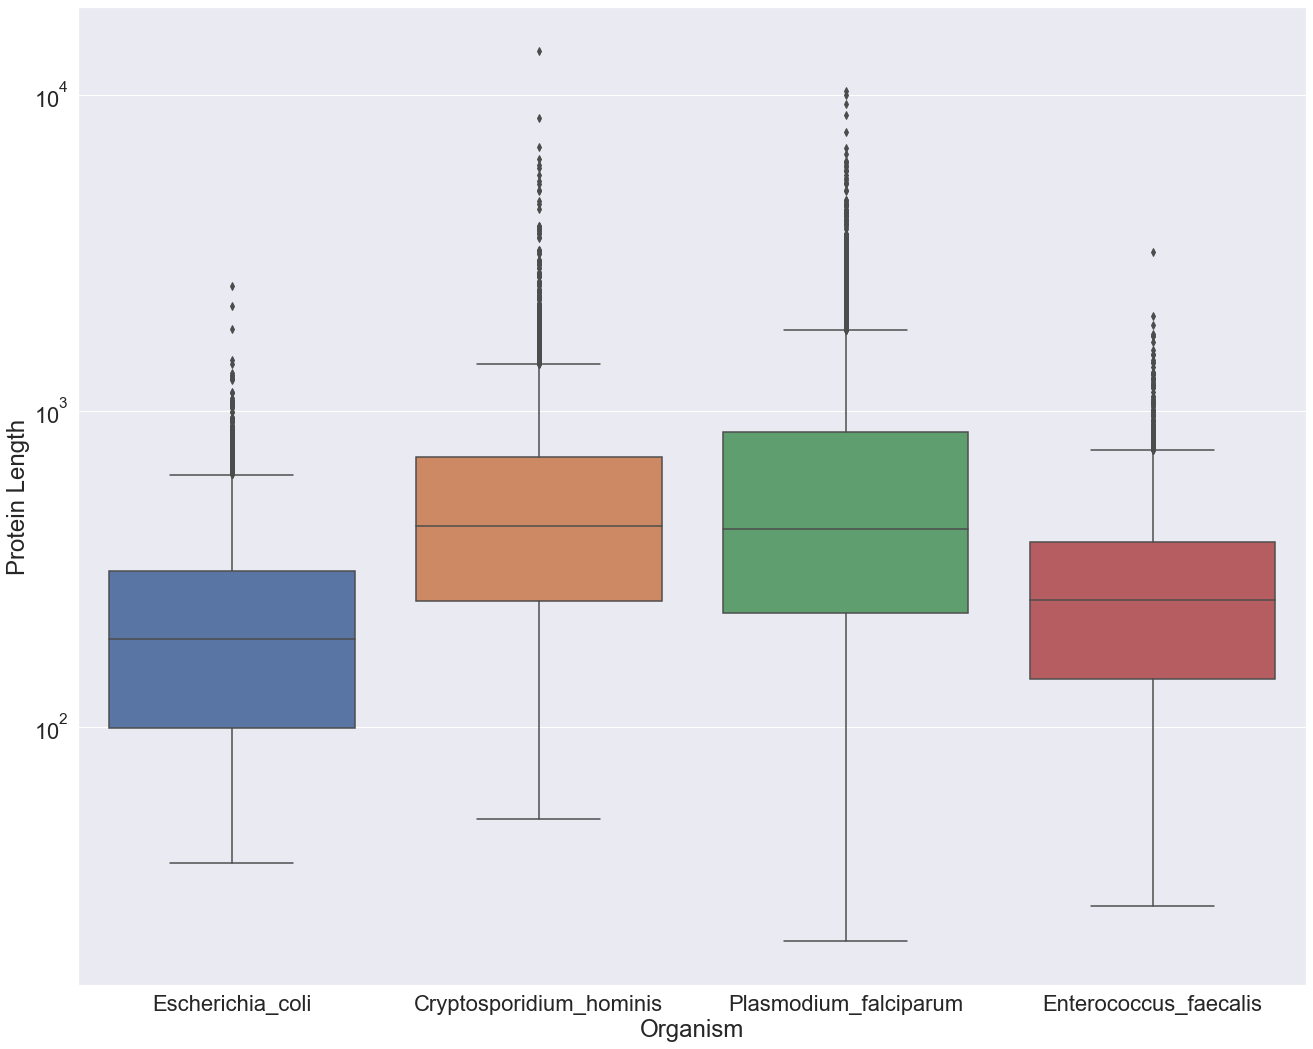

In [198]:
f, ax = plt.subplots()
ax.set(yscale="log")
sns.boxplot(x="Organism", y="Protein Length", data=protein_lengths, ax=ax)

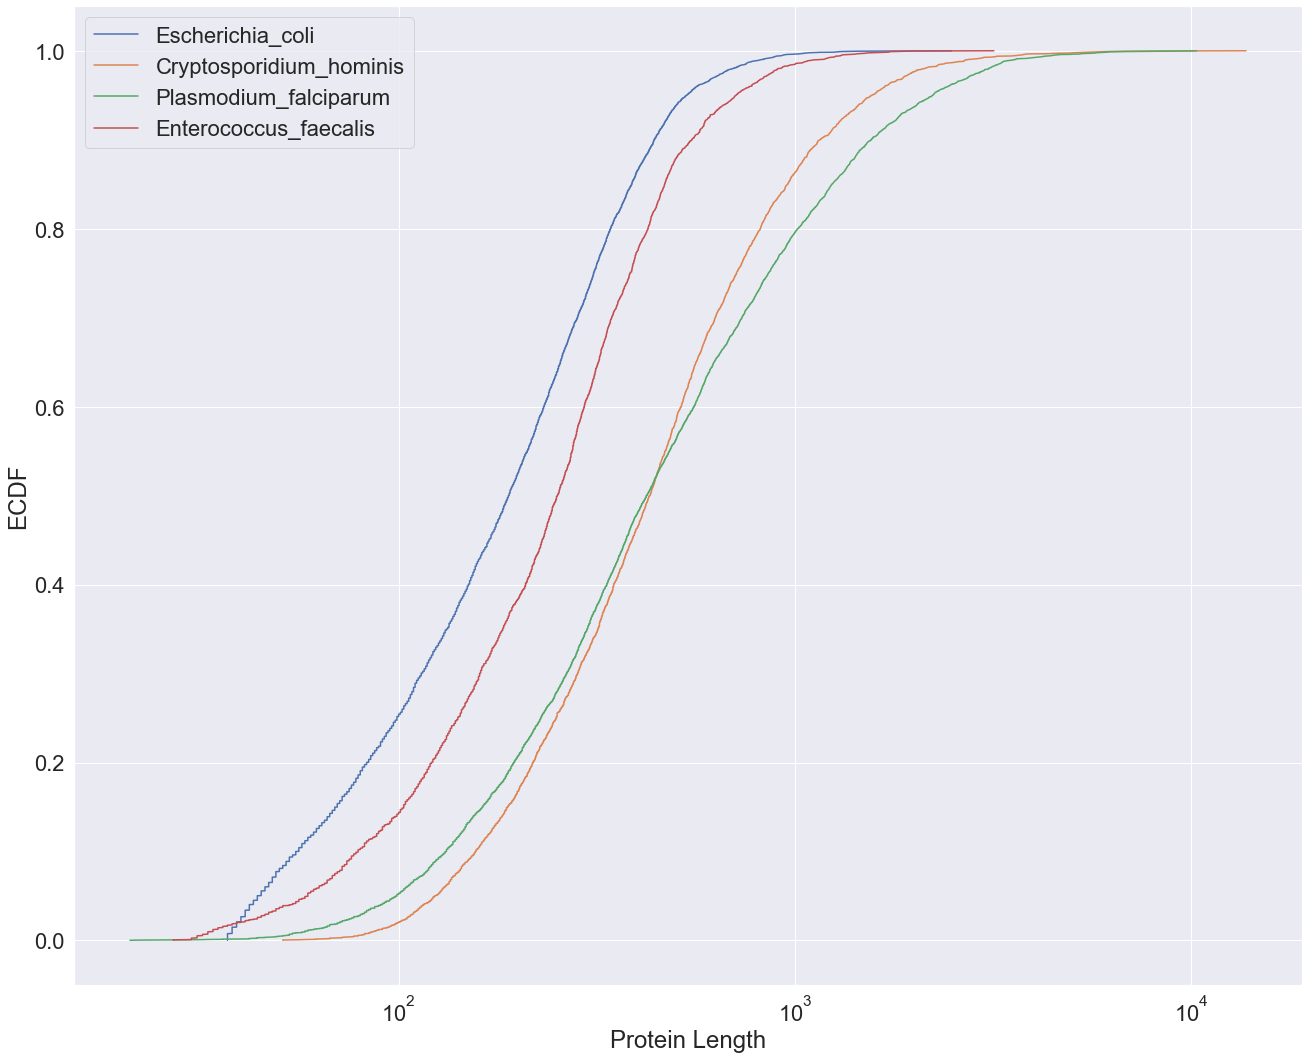

In [199]:
f, ax = plt.subplots()
ax.set(xscale="log")
for organism in protein_lengths["Organism"].unique():
    x = np.sort(protein_lengths[protein_lengths["Organism"]==organism]["Protein Length"])
    n = x.size
    y = np.arange(1, n+1) / n
    ax.plot(x, y, label=organism)
plt.legend()
plt.xlabel("Protein Length")
plt.ylabel("ECDF")
plt.show()

/Users/wassilyminkow/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/Users/wassilyminkow/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  line, = ax.plot(a.mean(), 0)


Text(0, 0.5, '# of gens')

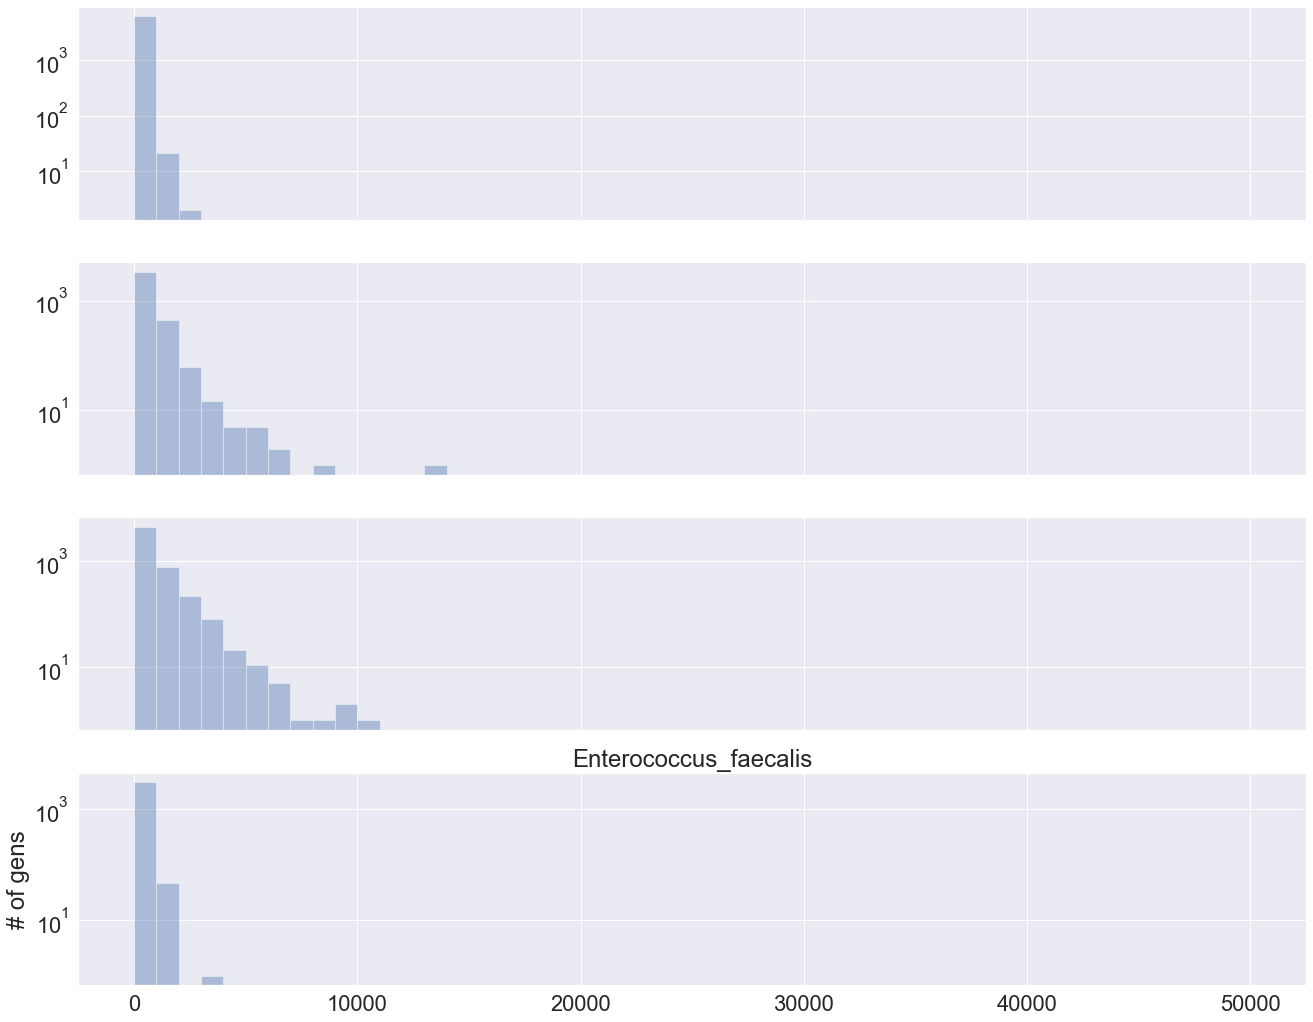

In [220]:
f, ax = plt.subplots(4, sharex=True)

for i, organism in enumerate(protein_lengths["Organism"].unique()):
    ax[i].set(yscale="log")
    sns.distplot(protein_lengths[protein_lengths["Organism"]==organism]["Protein Length"].as_matrix(), 
                label=organism, 
                kde=False, 
                ax=ax[i],
                hist_kws={"range": [0, 5e4], "label":organism})
    
plt.set_title()
plt.set_ylabel("# of gens")
